#### read, clean data and load into csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("./Data/data.xlsx", index_col = 0)


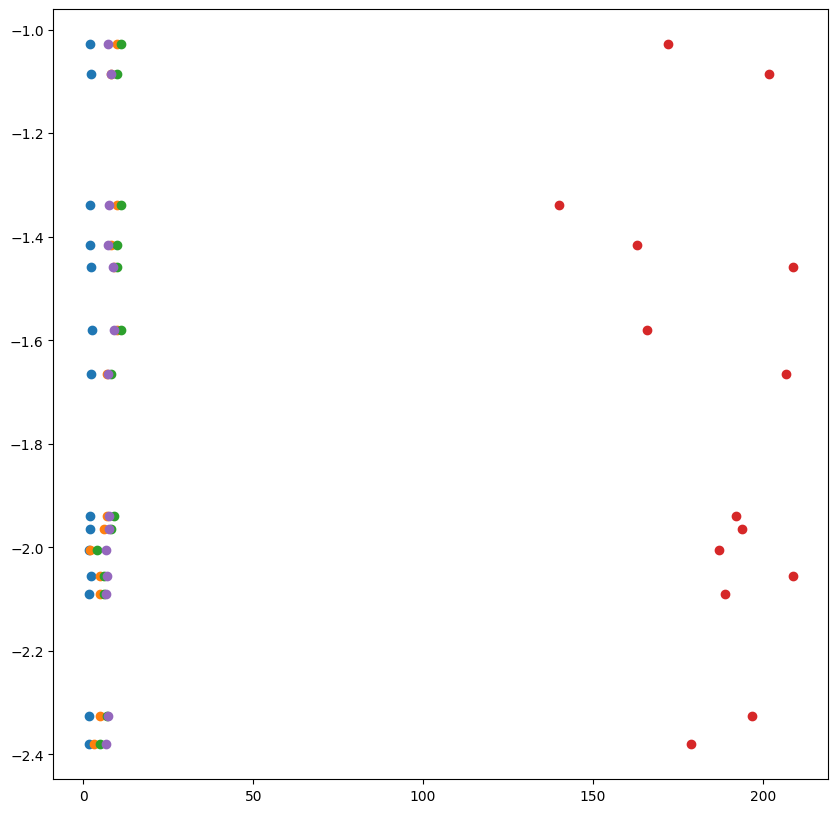

In [3]:
#visualize the data

plt.figure(figsize=(10,10))
plt.scatter(df['electronegativity'], df['1V-ORR'])
plt.scatter(df['d orbital of metal'], df['1V-ORR'])
plt.scatter(df['group'], df['1V-ORR'])
plt.scatter(df['radius/pm'], df['1V-ORR'])
plt.scatter(df['first ionization energy'], df['1V-ORR'])
#plt.xlabel(x, fontsize=12)
#plt.ylabel(y, fontsize=12)
plt.show()

In [4]:
def normaldata(data):
    avg = data.mean()
    std = data.std()
    newdata = (data - avg) / std
    return newdata

df['electronegativity'] = normaldata(df['electronegativity'])
df['d orbital of metal'] = normaldata(df['d orbital of metal'])
df['group'] = normaldata(df['group'])
df['radius/pm'] = normaldata(df['radius/pm'])
df['first ionization energy'] = normaldata(df['first ionization energy'])

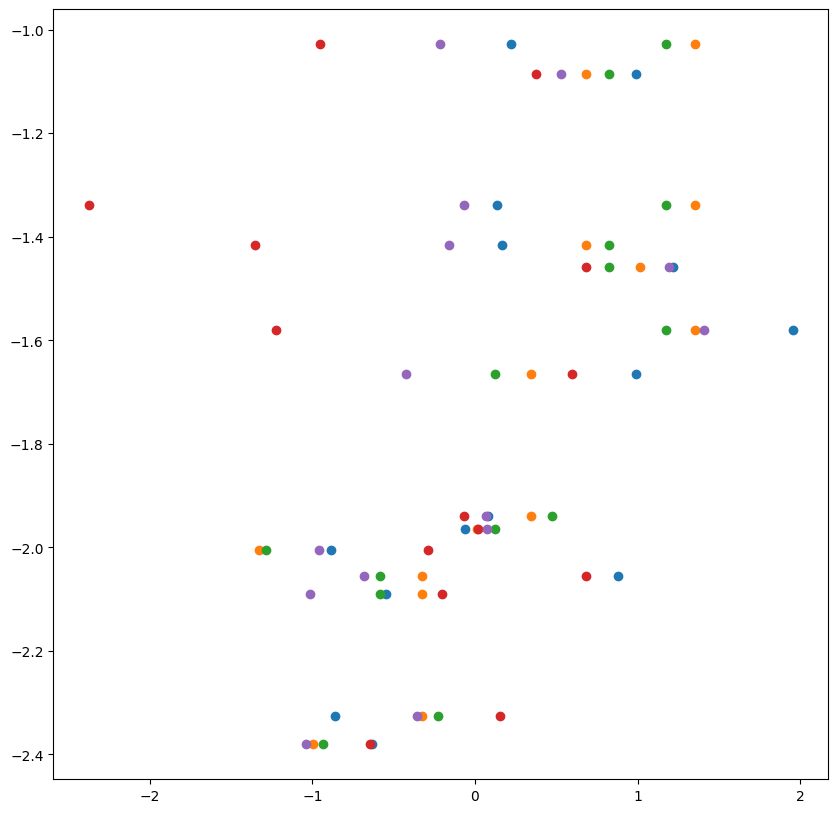

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(df['electronegativity'], df['1V-ORR'])
plt.scatter(df['d orbital of metal'], df['1V-ORR'])
plt.scatter(df['group'], df['1V-ORR'])
plt.scatter(df['radius/pm'], df['1V-ORR'])
plt.scatter(df['first ionization energy'], df['1V-ORR'])
#plt.xlabel(x, fontsize=12)
#plt.ylabel(y, fontsize=12)
plt.show()

In [6]:
# data for 
dfTrain = df.head(14)
dfTest = df.tail(15)


In [7]:
dfTrain.to_csv("./Data/dataTrain.csv", index=False, header=True)
dfTest.to_csv("./Data/dataTest.csv", index=False, header=True)

### Linear Model

In [8]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#### Linear Regression

In [9]:
# read data
X = pd.read_csv("./Data/dataTrain.csv", header=0, usecols = ['electronegativity', 'd orbital of metal', 'group', 'radius/pm', 'first ionization energy'])
y = pd.read_csv("./Data/dataTrain.csv", header=0, usecols= ['2V-ORR'])

# split training and test data #1V-ORR-random_state=43; 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# initial model
model = linear_model.LinearRegression()

# train model
model.fit(X_train, y_train)

#test
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"using linear regression algorithm: {mse}")

using linear regression algorithm: 0.6558697979467538


#### Ridge Regression

In [10]:
# the smaller the alpha, the easy the model. alpha = 0, it become linear model
model = linear_model.Ridge(alpha=10.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"using ridge regression algorithm: {mse}")

using ridge regression algorithm: 0.5333881299312649


#### Lasso Regression

In [11]:
model = linear_model.Lasso(alpha=1.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"using lasso regression algorithm: {mse}")

using lasso regression algorithm: 0.5172180124666667


### Decision Tree

#### Decision Tree Regression

In [12]:
from sklearn import tree

model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"using decision tree regression algorithm: {mse}")

using decision tree regression algorithm: 0.30249759029999984


### Ensemble

#### Random Forest Regression

In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=40)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"random forest regressor: {mse}")

random forest regressor: 0.5013667162915263


C:\Users\lpwu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
